In [1]:
# TODO, show differences related to post-selecting for depth vs post-selectng for total gates added
from qiskit.transpiler import CouplingMap
from mirror_gates.pass_managers import SabreMS, QiskitLevel3
from transpile_benchy.metrics.gate_counts import DepthMetric, TotalMetric

In [2]:
from transpile_benchy.library import CircuitLibrary

# library = CircuitLibrary.from_txt("../medium_circuits.txt")
library = CircuitLibrary.from_txt("qft.txt")

In [3]:
coupling_map = CouplingMap.from_heavy_hex(5)
transpilers = [
    QiskitLevel3(coupling_map),
    SabreMS(coupling_map, name="SABREMS-MinSwaps", cost_function="basic"),
    SabreMS(coupling_map, name="SABREMS-MinDepth"),
]

metrics = [DepthMetric(consolidate=False), TotalMetric(consolidate=False)]

In [4]:
from transpile_benchy.benchmark import Benchmark

# only interested in TimeMetric, is there by default
benchmark = Benchmark(
    transpilers=transpilers,
    circuit_library=library,
    metrics=metrics,
    num_runs=1,
)
benchmark.run()

Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 0.50	 | xx_plus_yy(-1.57080)
 50.00% =    1/2    	 | 1.00	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)
100.00% =    1/1    	 | 1.50	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)


Circuits from library:   0%|          | 0/1 [00:00<?, ?it/s]

Loading qft_n18 from QASMBench


Circuits from library: 100%|██████████| 1/1 [00:21<00:00, 21.66s/it]


In [5]:
benchmark.summary_statistics(transpilers[0], transpilers[1])

{'monodromy_depth': {'average_change': -1.7241379310344462,
  'best_circuit': 'qft_n18',
  'worst_circuit': 'qft_n18'},
 'monodromy_total': {'average_change': 7.804878048780509,
  'best_circuit': 'qft_n18',
  'worst_circuit': 'qft_n18'},
 'total_runtime': {'average_change': 1274.3919776051514,
  'best_circuit': 'qft_n18',
  'worst_circuit': 'qft_n18'}}

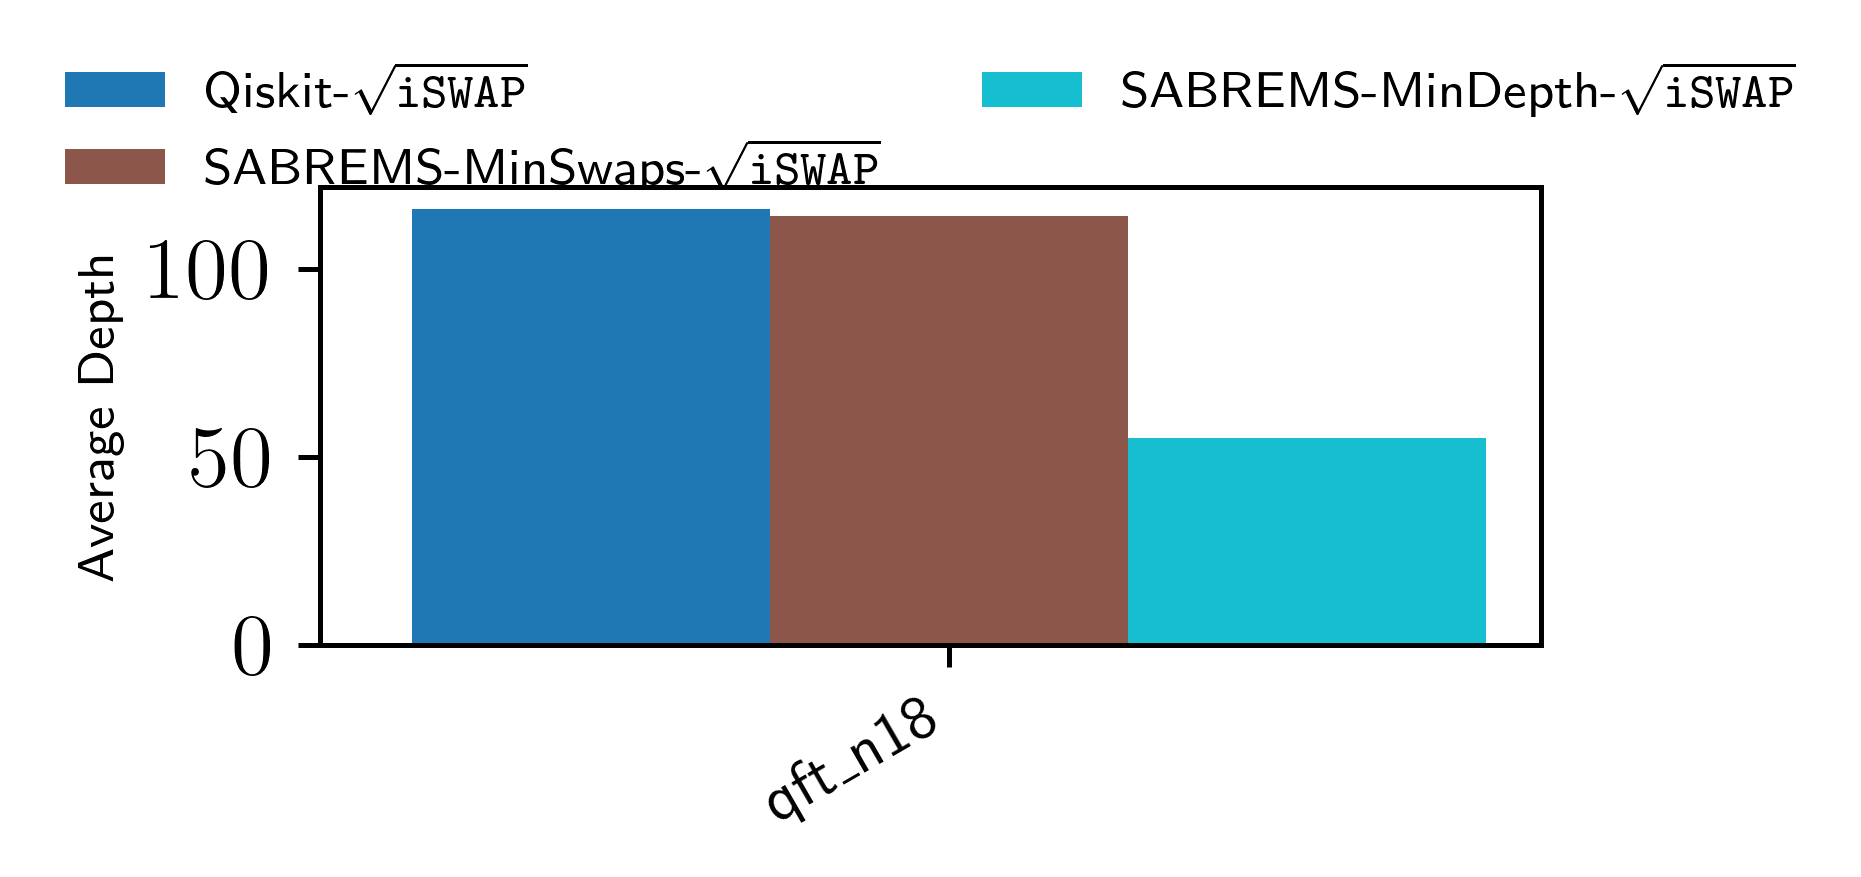

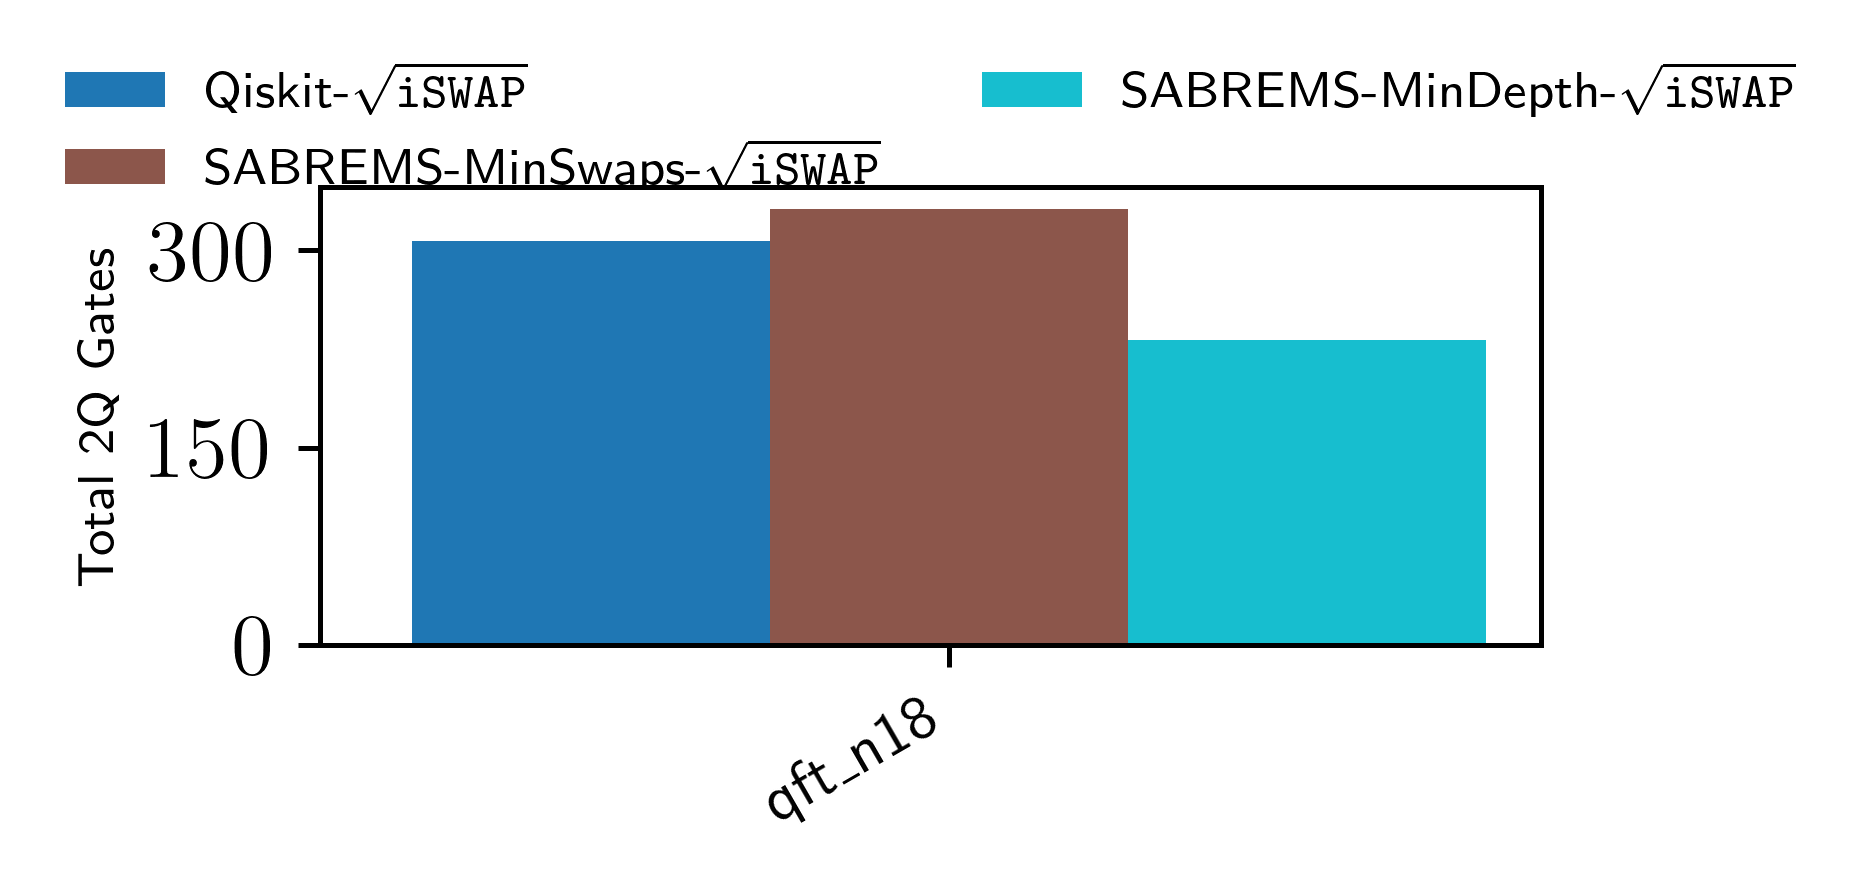

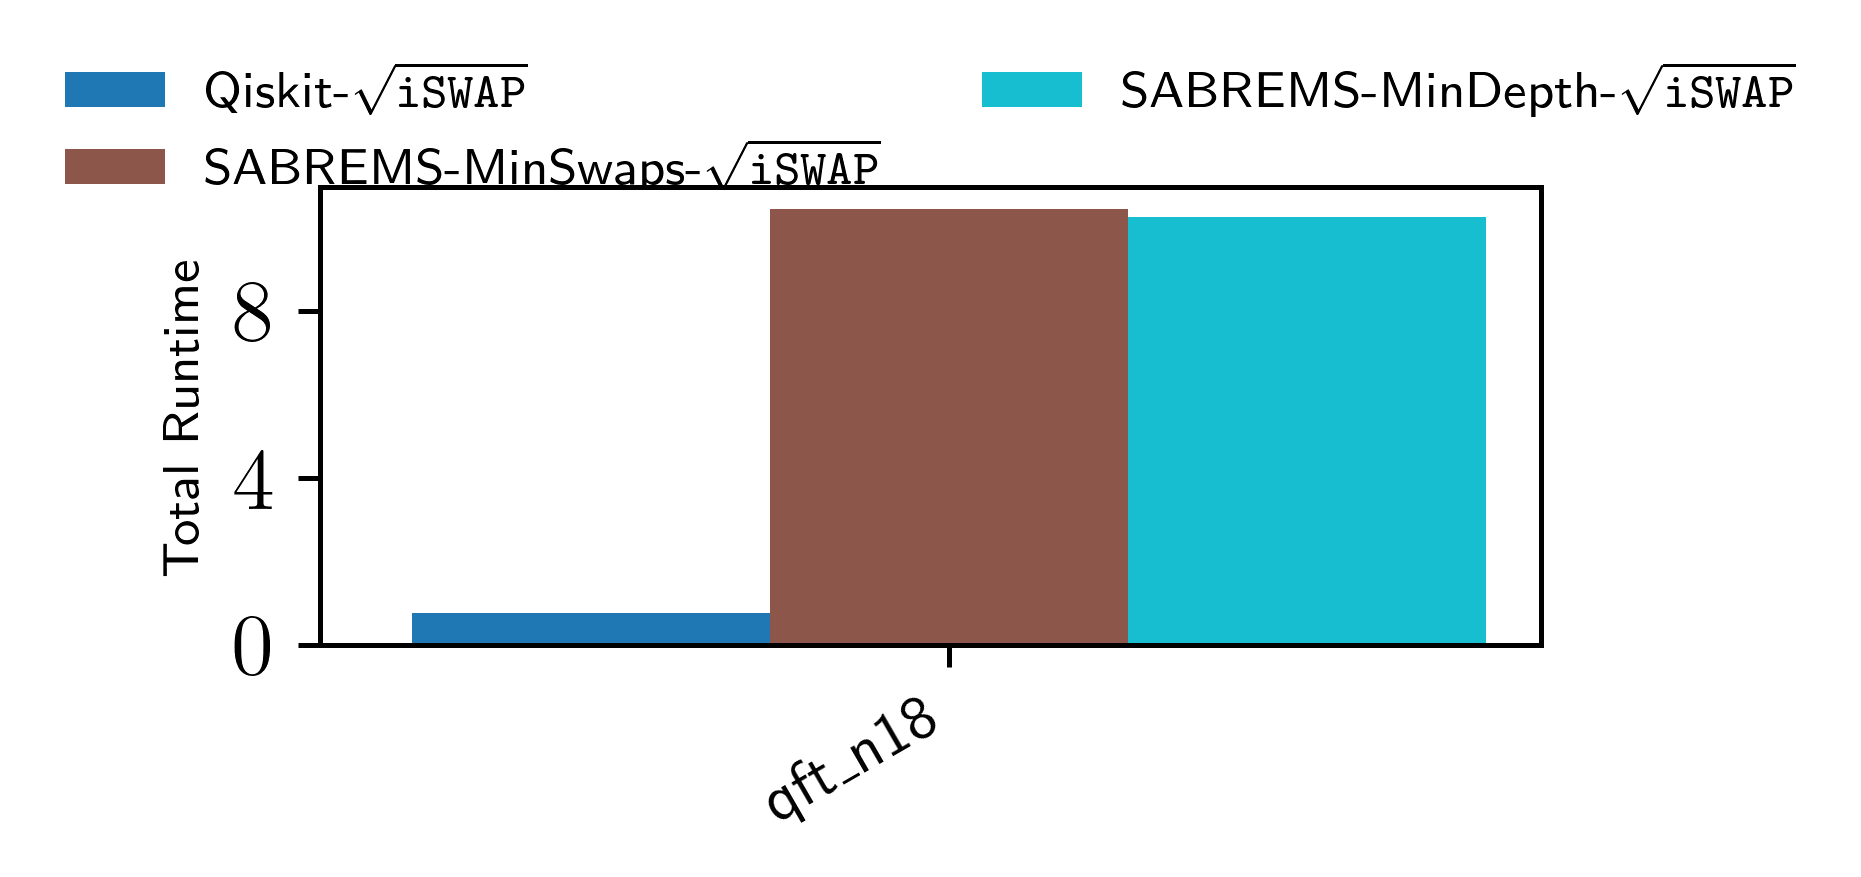

In [6]:
from transpile_benchy.render import plot_benchmark

plot_benchmark(benchmark, save=0, legend_show=1, filename="post")